In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Load data**

In [ ]:
df = pd.read_csv("https://introtomlsampledata.blob.core.windows.net/data/bike-rental/bike-rental-hour.csv")

**Data exploration/analysis**

The head() function is used to get the first n rows.This function returns the first n rows for the object based on position. It is useful for quickly testing the type of data.



In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Shape of the data

In [ ]:
df.shape

(17379, 17)

The dataset contains 17379 observations and 13 attributes

In [ ]:
df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### The info() function is used to print a concise summary of a DataFrame. This method prints information about a DataFrame including the index dtype and column dtypes, non-null values and memory usage

Check for missing values

In [ ]:
df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

From above information we can see that there is no null values.

Convert season and weathersit columns into categorical

In [ ]:
col_names = ['season','weathersit']
for col in col_names:
    df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     17379 non-null  int64   
 1   dteday      17379 non-null  object  
 2   season      17379 non-null  category
 3   yr          17379 non-null  int64   
 4   mnth        17379 non-null  int64   
 5   hr          17379 non-null  int64   
 6   holiday     17379 non-null  int64   
 7   weekday     17379 non-null  int64   
 8   workingday  17379 non-null  int64   
 9   weathersit  17379 non-null  category
 10  temp        17379 non-null  float64 
 11  atemp       17379 non-null  float64 
 12  hum         17379 non-null  float64 
 13  windspeed   17379 non-null  float64 
 14  casual      17379 non-null  int64   
 15  registered  17379 non-null  int64   
 16  cnt         17379 non-null  int64   
dtypes: category(2), float64(4), int64(10), object(1)
memory usage: 2.0+ MB


Exclude/drop column names: instant, dteday, casual,registered

In [ ]:
df = df.drop(['instant', 'dteday', 'casual' ,'registered'], axis=1)

After dropping again checking the data with head()function

In [ ]:
df.head(10)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,1
5,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,1
6,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2
7,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,3
8,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,8
9,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,14


Histogram(Seaborn Displot)
This plot allows to see the frequency of all values distributed in bins. Therefore only a single value is needed to produce this plot.

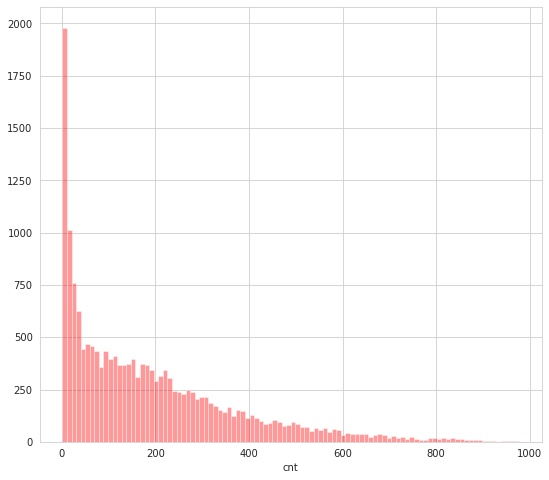

In [ ]:
plt.figure(figsize=(9,8))
sns.set_style('whitegrid') 
sns.distplot(df['cnt'], kde = False, color ='red', bins = 100) 


Now looking at this we can say that most of the count given lies between 0 and 200.

**Draw a set of vertical bar plots grouped by a categorical variable**

Seasonwise monthly distribution of counts

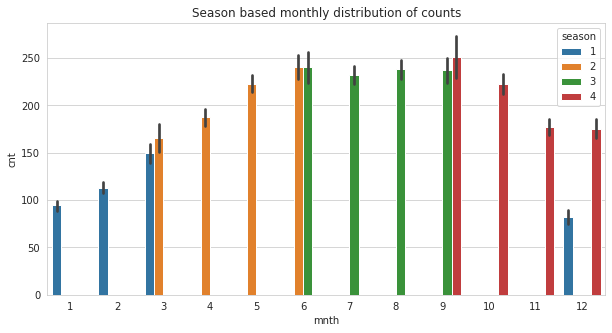

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','season']],hue='season',ax=ax)
ax.set_title('Season based monthly distribution of counts')
plt.show()

Weather condition based monthly distribution of counts

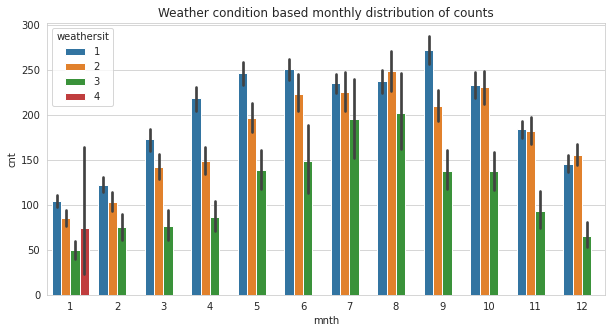

In [ ]:
fig,ax=plt.subplots(figsize=(10,5))
sns.barplot(x='mnth',y='cnt',data=df[['mnth','cnt','weathersit']],hue='weathersit',ax=ax)
ax.set_title('Weather condition based monthly distribution of counts')
plt.show()

**Correlation matrix of attributes**
A correlation matrix is a tabular data representing the ‘correlations’ between pairs of variables in a given data.

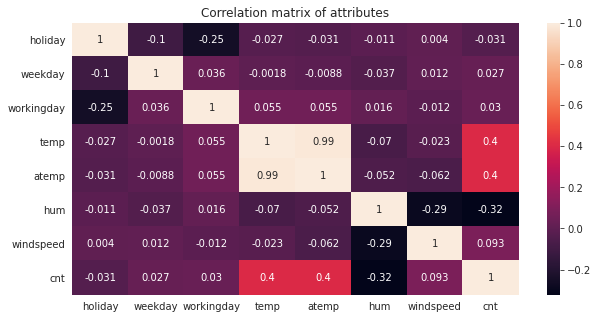

In [ ]:
corr_mat=df[['holiday','weekday','workingday','temp','atemp','hum', 'windspeed', 'cnt']].corr()
fig,ax=plt.subplots(figsize=(10,5))
sns.heatmap(corr_mat,annot=True,ax=ax)
ax.set_title('Correlation matrix of attributes')
plt.show()

Sortng the correlation matrix

In [ ]:
corre_mat = df.corr()
corr_pairs = corr_mat.unstack()
print(corr_pairs)

holiday  holiday       1.000000
         weekday      -0.102088
         workingday   -0.252471
         temp         -0.027340
         atemp        -0.030973
                         ...   
cnt      temp          0.404772
         atemp         0.400929
         hum          -0.322911
         windspeed     0.093234
         cnt           1.000000
Length: 64, dtype: float64


In [ ]:
sorted_pairs = corr_pairs.sort_values(kind="quicksort")

print(sorted_pairs)

hum         cnt          -0.322911
cnt         hum          -0.322911
windspeed   hum          -0.290105
hum         windspeed    -0.290105
holiday     workingday   -0.252471
                            ...   
temp        temp          1.000000
workingday  workingday    1.000000
weekday     weekday       1.000000
windspeed   windspeed     1.000000
cnt         cnt           1.000000
Length: 64, dtype: float64


Selecting negative correlation pairs

In [ ]:
negative_pairs = sorted_pairs[sorted_pairs < 0]

print(negative_pairs)

hum         cnt          -0.322911
cnt         hum          -0.322911
windspeed   hum          -0.290105
hum         windspeed    -0.290105
holiday     workingday   -0.252471
workingday  holiday      -0.252471
holiday     weekday      -0.102088
weekday     holiday      -0.102088
hum         temp         -0.069881
temp        hum          -0.069881
atemp       windspeed    -0.062336
windspeed   atemp        -0.062336
atemp       hum          -0.051918
hum         atemp        -0.051918
weekday     hum          -0.037158
hum         weekday      -0.037158
holiday     atemp        -0.030973
atemp       holiday      -0.030973
cnt         holiday      -0.030927
holiday     cnt          -0.030927
            temp         -0.027340
temp        holiday      -0.027340
            windspeed    -0.023125
windspeed   temp         -0.023125
            workingday   -0.011830
workingday  windspeed    -0.011830
hum         holiday      -0.010588
holiday     hum          -0.010588
atemp       weekday 

Selecting strong correlation pairs (magnitude greater than 0.5)

In [ ]:
strong_pairs = sorted_pairs[abs(sorted_pairs) > 0.5]

print(strong_pairs)

temp        atemp         0.987672
atemp       temp          0.987672
holiday     holiday       1.000000
hum         hum           1.000000
atemp       atemp         1.000000
temp        temp          1.000000
workingday  workingday    1.000000
weekday     weekday       1.000000
windspeed   windspeed     1.000000
cnt         cnt           1.000000
dtype: float64
